# Testing KMeans algo

## Download dataset

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "data.csv"
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "samuelcortinhas/2d-clustering-data",
  file_path,
)

C:\Users\octam\AppData\Local\Temp\ipykernel_32684\1909651431.py:5: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


In [3]:
df.head()

,x,y,color
0,516.012706,393.014514,0
1,436.211762,408.656585,0
2,512.052601,372.022014,0
3,489.140464,401.807159,0
4,446.207986,338.516682,0


## Simple visualization

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='x', ylabel='y'>

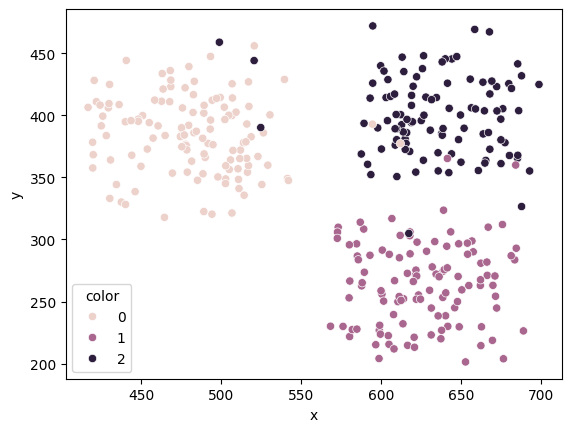

In [5]:
sns.scatterplot(data = df, x = 'x', y = 'y', hue='color')

In [6]:
df.color.unique()

array([0, 1, 2])

In [7]:
from KMeans import KMeans

In [8]:
km = KMeans(3)
from sklearn.preprocessing import StandardScaler 

In [9]:
scaler = StandardScaler()
X = df[['x','y']]
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-7.74793930e-01,  6.45929135e-01],
       [-1.78685736e+00,  8.75542061e-01],
       [-8.25017360e-01,  3.37776245e-01],
       [-1.11559708e+00,  7.74998045e-01],
       [-1.66008176e+00, -1.54054865e-01],
       [-7.69699577e-01,  7.60847493e-02],
       [-9.85655141e-01,  9.60324820e-01],
       [-1.11339704e+00,  8.66881497e-01],
       [-1.73742625e+00,  6.72456820e-01],
       [-1.68657284e+00,  2.76538945e-01],
       [-1.85481732e+00,  2.20699499e-01],
       [-1.45035503e+00,  9.14895000e-01],
       [-6.55857221e-01, -6.99406331e-02],
       [-1.10486051e+00,  2.50558980e-01],
       [-8.01503182e-01,  4.25792426e-01],
       [-1.16540789e+00, -1.96352141e-02],
       [-6.08561951e-01,  1.59046912e-01],
       [-7.40875944e-01,  4.94836865e-01],
       [-1.42746201e+00, -4.58168283e-01],
       [-1.11565006e+00, -3.89434066e-01],
       [-7.61776835e-01,  1.53955893e-01],
       [-9.53470752e-01,  8.45050322e-01],
       [-7.58123283e-01,  8.54071140e-01],
       [-1.

In [11]:
km = km.fit(X_scaled)

In [12]:
km.transform(X_scaled)

array([[1.54057113, 2.35975337, 0.46260421],
       [2.55351236, 3.21615604, 0.65807696],
       [1.63782079, 2.15249298, 0.44485569],
       ...,
       [0.45605582, 1.68118468, 1.67028969],
       [1.69677907, 3.12748493, 1.15348761],
       [0.55078541, 1.94302398, 1.44834442]], shape=(336, 3))

In [14]:
predictions = km.predict(X_scaled)

In [19]:
df['predictions'] = predictions

In [18]:
predictions - y

array([ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -2

In [20]:
df

,x,y,color,predictions
0,516.012706,393.014514,0,2
1,436.211762,408.656585,0,2
2,512.052601,372.022014,0,2
3,489.140464,401.807159,0,2
4,446.207986,338.516682,0,2
...,...,...,...,...
331,638.916471,323.569096,1,1
332,542.005901,347.527070,0,2
333,611.964612,377.254978,0,0
334,520.654168,455.996453,0,2


Let's bring it to the same form 0->2 and 2->0

In [22]:
df['predictions'] = df['predictions'].apply(lambda x: 0 if x==2 else(2 if x==0 else x))

## Visualizations with the predictions

<Axes: xlabel='x', ylabel='y'>

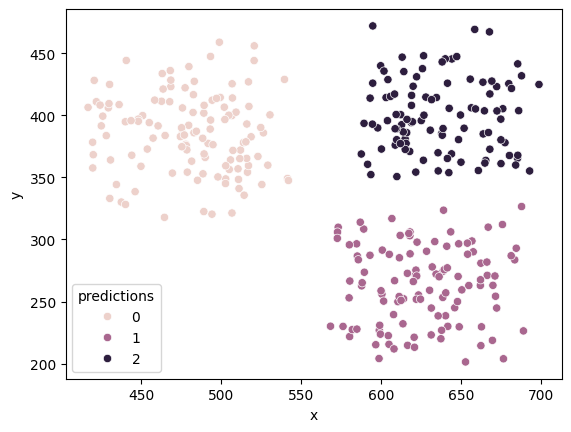

In [23]:
sns.scatterplot(data = df, x = 'x', y = 'y', hue='predictions')

In [27]:
aux = df['predictions'] - df['color']

In [ ]:
(aux!=0).sum() 

np.int64(9)

Just 9 differences from the original dataset